## Data Dive II


In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',3000)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings('ignore')

C:\Users\Katabatic\AppData\Local\Temp\ipykernel_20444\2336519667.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # a style that can be used for plots - see style reference above


In [2]:
# import data set and assign to variable
df_CB = pd.read_csv(r"C:\Users\Katabatic\Desktop\Data 3500\Data Dive 2\CBB.csv", index_col = 0, header = 0)

In [3]:
# get basic info on the dataset such as how many columns, rows and data types
print(df_CB.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3523 entries, North Carolina to North Texas
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CONFERENCE  3523 non-null   object 
 1   #GAMES      3523 non-null   int64  
 2   #WINS       3523 non-null   int64  
 3   ADJOE       3523 non-null   float64
 4   ADJDE       3523 non-null   float64
 5   BARTHAG     3523 non-null   float64
 6   EFG_O       3523 non-null   float64
 7   EFG_D       3523 non-null   float64
 8   TOR         3523 non-null   float64
 9   TORD        3523 non-null   float64
 10  ORB         3523 non-null   float64
 11  DRB         3523 non-null   float64
 12  FTR         3523 non-null   float64
 13  FTRD        3523 non-null   float64
 14  2P_O        3523 non-null   float64
 15  2P_D        3523 non-null   float64
 16  3P_O        3523 non-null   float64
 17  3P_D        3523 non-null   float64
 18  ADJ_T       3523 non-null   float64
 19  WAB         

In this dataset we have 23 columns, with most of the data types being numeric. We have 3523 rows of data to work with for most columns. 

In [4]:
# get basic stats on each column
df_CB.describe()

,#GAMES,#WINS,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,680.000000,3523.000000
mean,30.486233,15.990633,103.151320,103.153250,0.494067,49.887823,50.087113,18.696509,18.625092,29.308544,29.516747,34.529066,34.802555,49.112433,49.289299,34.185580,34.369316,67.735339,-7.579620,8.801471,2017.828555
std,3.951584,6.572893,7.264859,6.511989,0.255338,3.078505,2.894967,2.104119,2.241067,4.214131,3.234810,5.514264,6.396757,3.400389,3.317012,2.729186,2.435546,3.091703,6.815976,4.673461,3.257824
min,5.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,14.400000,18.400000,19.600000,16.500000,37.700000,37.700000,24.900000,26.100000,57.200000,-25.200000,1.000000,2013.000000
25%,29.000000,11.000000,98.200000,98.400000,0.281300,47.900000,48.100000,17.300000,17.100000,26.500000,27.300000,30.600000,30.200000,46.800000,47.100000,32.300000,32.700000,65.700000,-12.600000,5.000000,2015.000000
50%,31.000000,16.000000,102.800000,103.200000,0.475600,49.800000,50.100000,18.600000,18.500000,29.400000,29.500000,34.300000,34.100000,49.000000,49.300000,34.100000,34.300000,67.700000,-7.900000,9.000000,2018.000000
75%,33.000000,21.000000,107.900000,107.800000,0.714250,51.900000,52.000000,20.000000,20.100000,32.100000,31.700000,38.100000,38.800000,51.300000,51.500000,36.000000,36.000000,69.700000,-3.000000,13.000000,2021.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,61.000000,60.100000,27.100000,28.500000,43.600000,40.400000,58.600000,60.700000,64.000000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2023.000000


## My first question is what leads to winning the most games?

First thing is to turn our catecorical predictors into numerical.

In [5]:
df_CB = pd.get_dummies(df_CB, columns=['CONFERENCE'], prefix='CONFERENCE')
df_CB = pd.get_dummies(df_CB, columns=['POSTSEASON'])

df_CB.head() #print the head to make sure the dummy variables were created

,#GAMES,#WINS,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR,CONFERENCE_A10,CONFERENCE_ACC,CONFERENCE_AE,CONFERENCE_ASun,CONFERENCE_Amer,CONFERENCE_B10,CONFERENCE_B12,CONFERENCE_BE,CONFERENCE_BSky,CONFERENCE_BSth,CONFERENCE_BW,CONFERENCE_CAA,CONFERENCE_CUSA,CONFERENCE_GWC,CONFERENCE_Horz,CONFERENCE_Ind,CONFERENCE_Ivy,CONFERENCE_MAAC,CONFERENCE_MAC,CONFERENCE_MEAC,CONFERENCE_MVC,CONFERENCE_MWC,CONFERENCE_NEC,CONFERENCE_OVC,CONFERENCE_P12,CONFERENCE_Pat,CONFERENCE_SB,CONFERENCE_SC,CONFERENCE_SEC,CONFERENCE_SWAC,CONFERENCE_Slnd,CONFERENCE_Sum,CONFERENCE_WAC,CONFERENCE_WCC,CONFERENCE_ind,POSTSEASON_2ND,POSTSEASON_Champions,POSTSEASON_E8,POSTSEASON_F4,POSTSEASON_R32,POSTSEASON_R64,POSTSEASON_R68,POSTSEASON_S16
TEAM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
North Carolina,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1.0,2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Wisconsin,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,1.0,2015,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Michigan,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,3.0,2018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Texas Tech,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,3.0,2019,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Gonzaga,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,1.0,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [7]:
# Replace missing values in the "SEED" column with 0
df_CB['SEED'].fillna(0, inplace=True)

In [24]:
df_CB.info() # to check the data types were all changed from object

<class 'pandas.core.frame.DataFrame'>
Index: 3523 entries, North Carolina to North Texas
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #GAMES                3523 non-null   int64  
 1   #WINS                 3523 non-null   int64  
 2   ADJOE                 3523 non-null   float64
 3   ADJDE                 3523 non-null   float64
 4   BARTHAG               3523 non-null   float64
 5   EFG_O                 3523 non-null   float64
 6   EFG_D                 3523 non-null   float64
 7   TOR                   3523 non-null   float64
 8   TORD                  3523 non-null   float64
 9   ORB                   3523 non-null   float64
 10  DRB                   3523 non-null   float64
 11  FTR                   3523 non-null   float64
 12  FTRD                  3523 non-null   float64
 13  2P_O                  3523 non-null   float64
 14  2P_D                  3523 non-null   float64
 15  3P_O  

<Axes: title={'center': 'Pearson Correlation of Features'}>

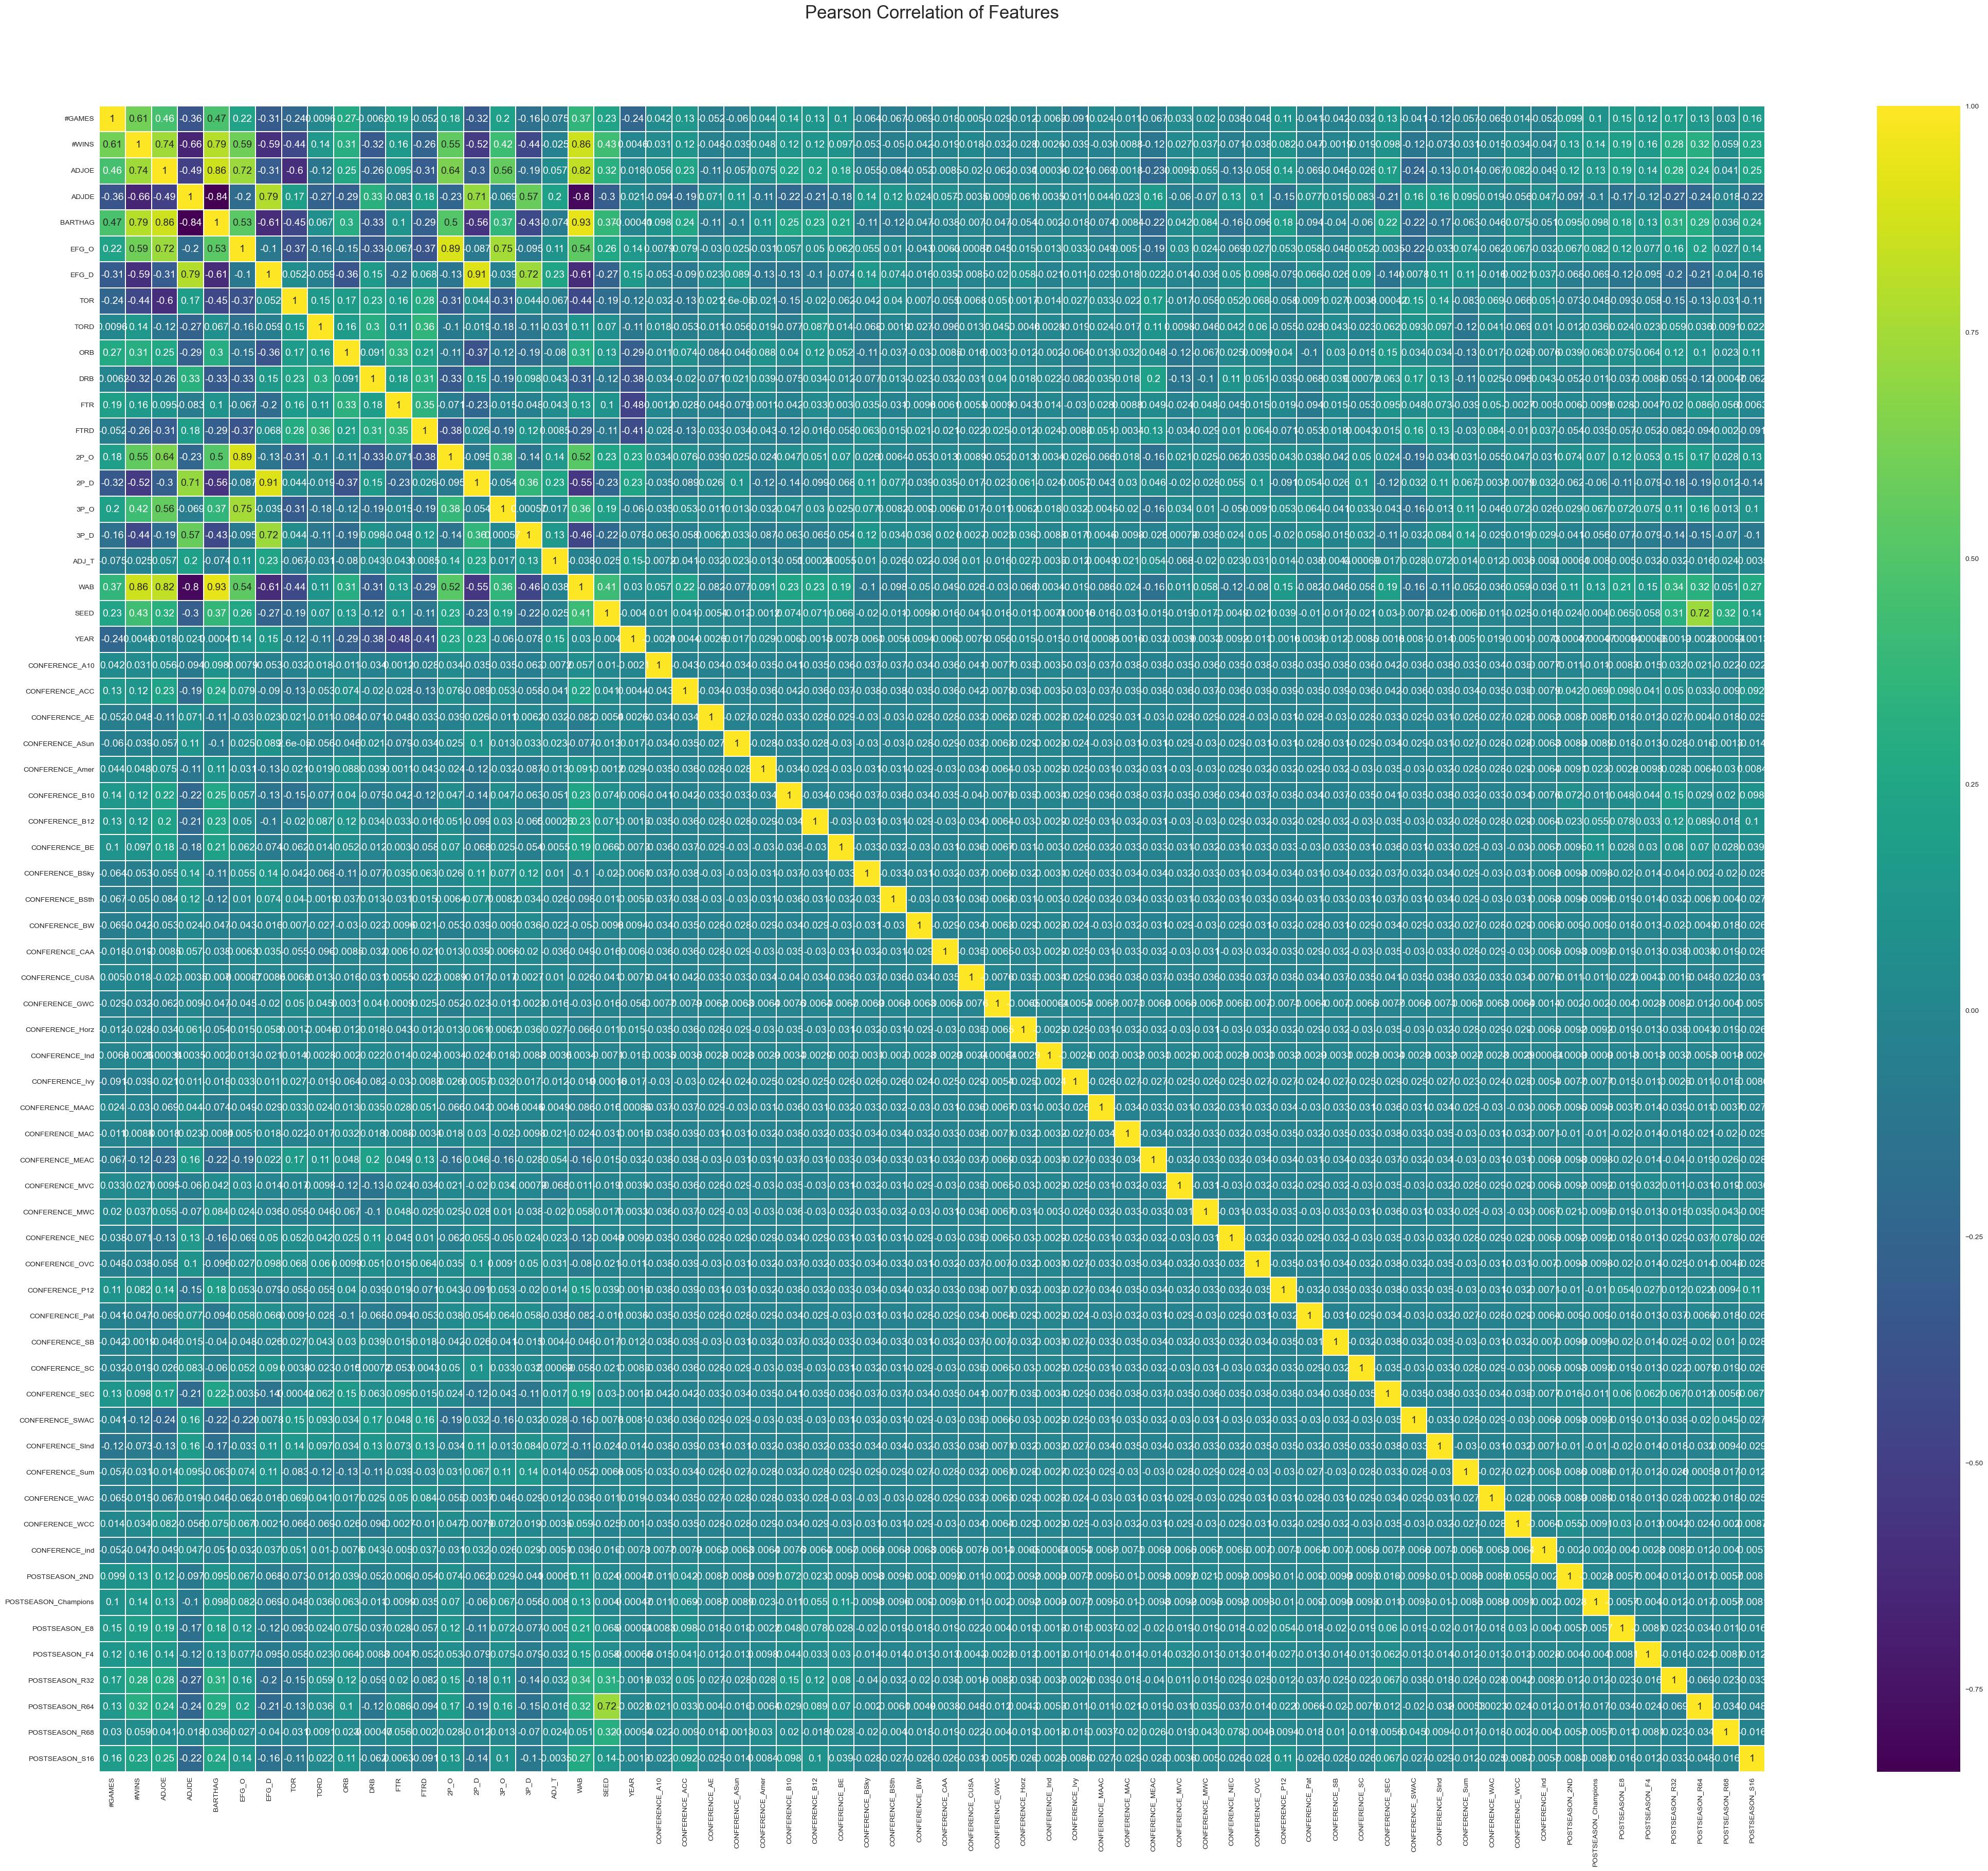

In [8]:
#get a visiual on what is highly correlated with wins
colormap = plt.cm.viridis
plt.figure(figsize=(50,40))
plt.title('Pearson Correlation of Features', y=1.05, size=25)
sns.heatmap(df_CB.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Building my lasso regression model.

First thing we need to do is standardize the dataset. Lasso requires this because so the penalty term affects each predictor equally. 

In [9]:
#import data scaling libraries and packages.
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, StandardScaler

#assign to variables so it is easier to implement in code
sc = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()
nm = Normalizer()

In [10]:
# remove wins from the data set since it does not need to be standardized
target = df_CB['#WINS']
df_CBP = df_CB.drop(['#WINS'], axis=1)

In [11]:
X = df_CBP

#keep target variable only for y
y = target 

#split the train test, here we are doing 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# fit the data i.e calculate the mean and sd of each coluns of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

iteration 1 done
iteration 10 done
iteration 50 done
iteration 100 done


<Figure size 2000x1000 with 0 Axes>

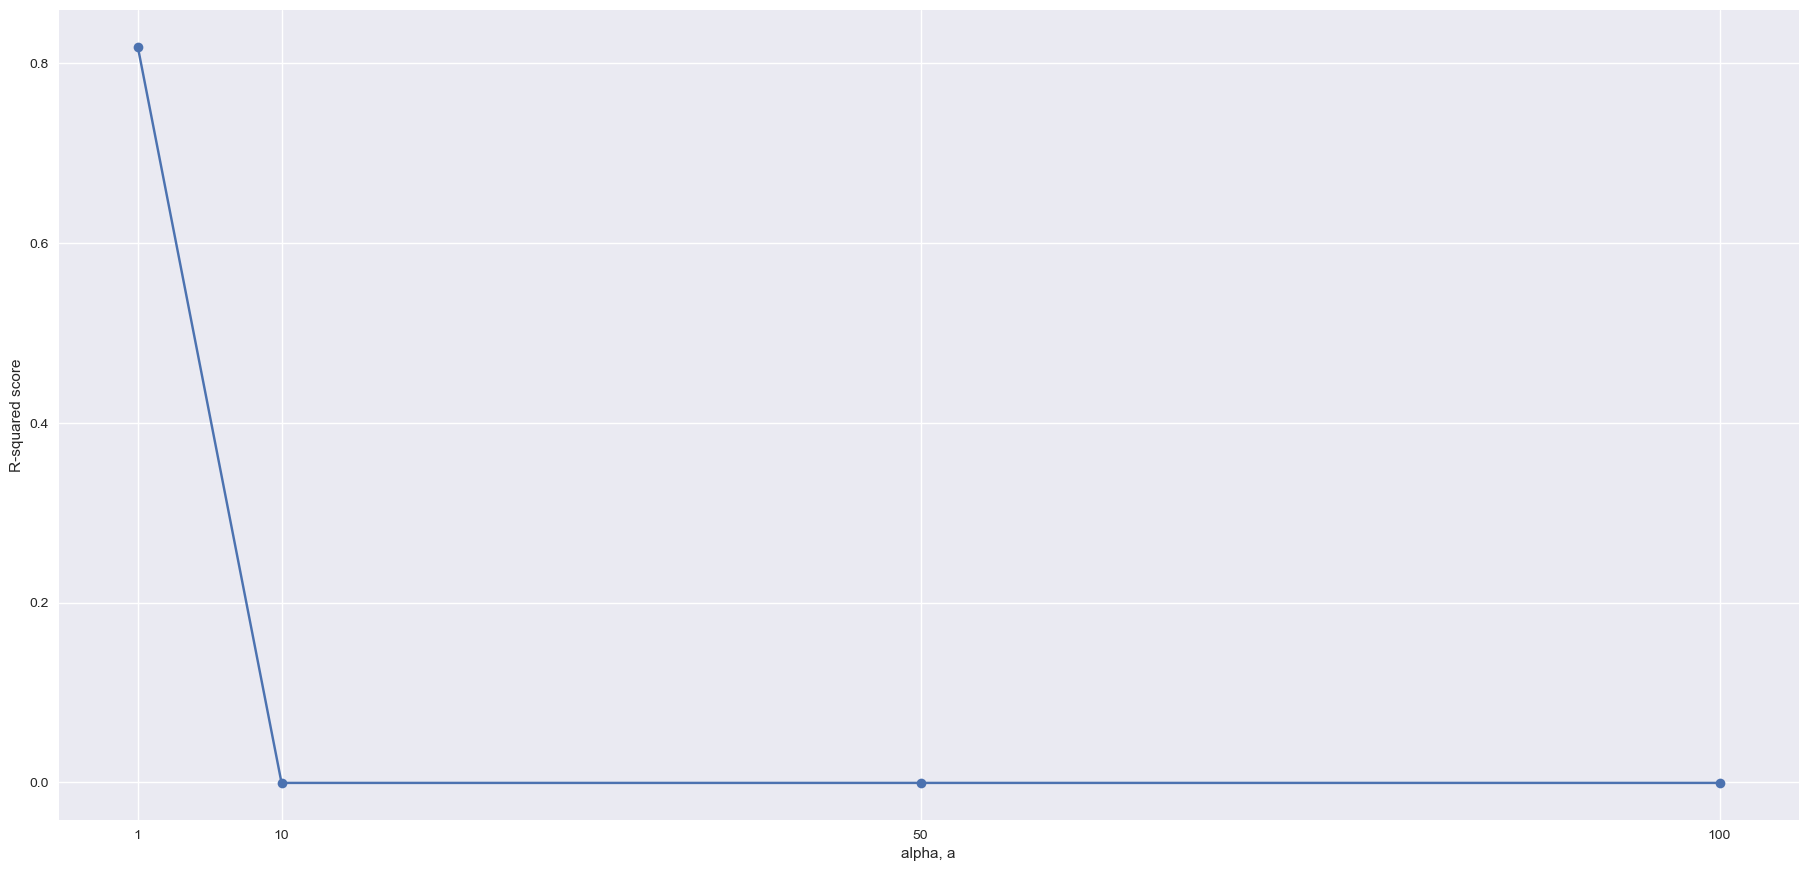

In [13]:
plt.figure(figsize=(20,10))


plt.figure(figsize=(20, 10))

alphas = [1,10,50,100]
scores = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X_train_sc, y_train)  # Fit the Lasso model
    score = lasso.score(X_test_sc, y_test)  # Calculate the R-squared score
    scores.append(score)
    print("iteration {} done".format(a))

plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('R-squared score')
plt.xticks(alphas)
plt.show()

Based upon the diagram above, our R squared significantly goes down as alpha increases. This means our alpha is going to be very small.

C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+02, tolerance: 1.210e+01
  model = cd_fast.enet_coordinate_descent(


iteration 1e-05 done


C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.990e+02, tolerance: 1.210e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.427e+02, tolerance: 1.210e+01
  model = cd_fast.enet_coordinate_descent(


iteration 5e-05 done
iteration 0.0001 done
iteration 0.001 done
iteration 0.01 done


<Figure size 2000x1000 with 0 Axes>

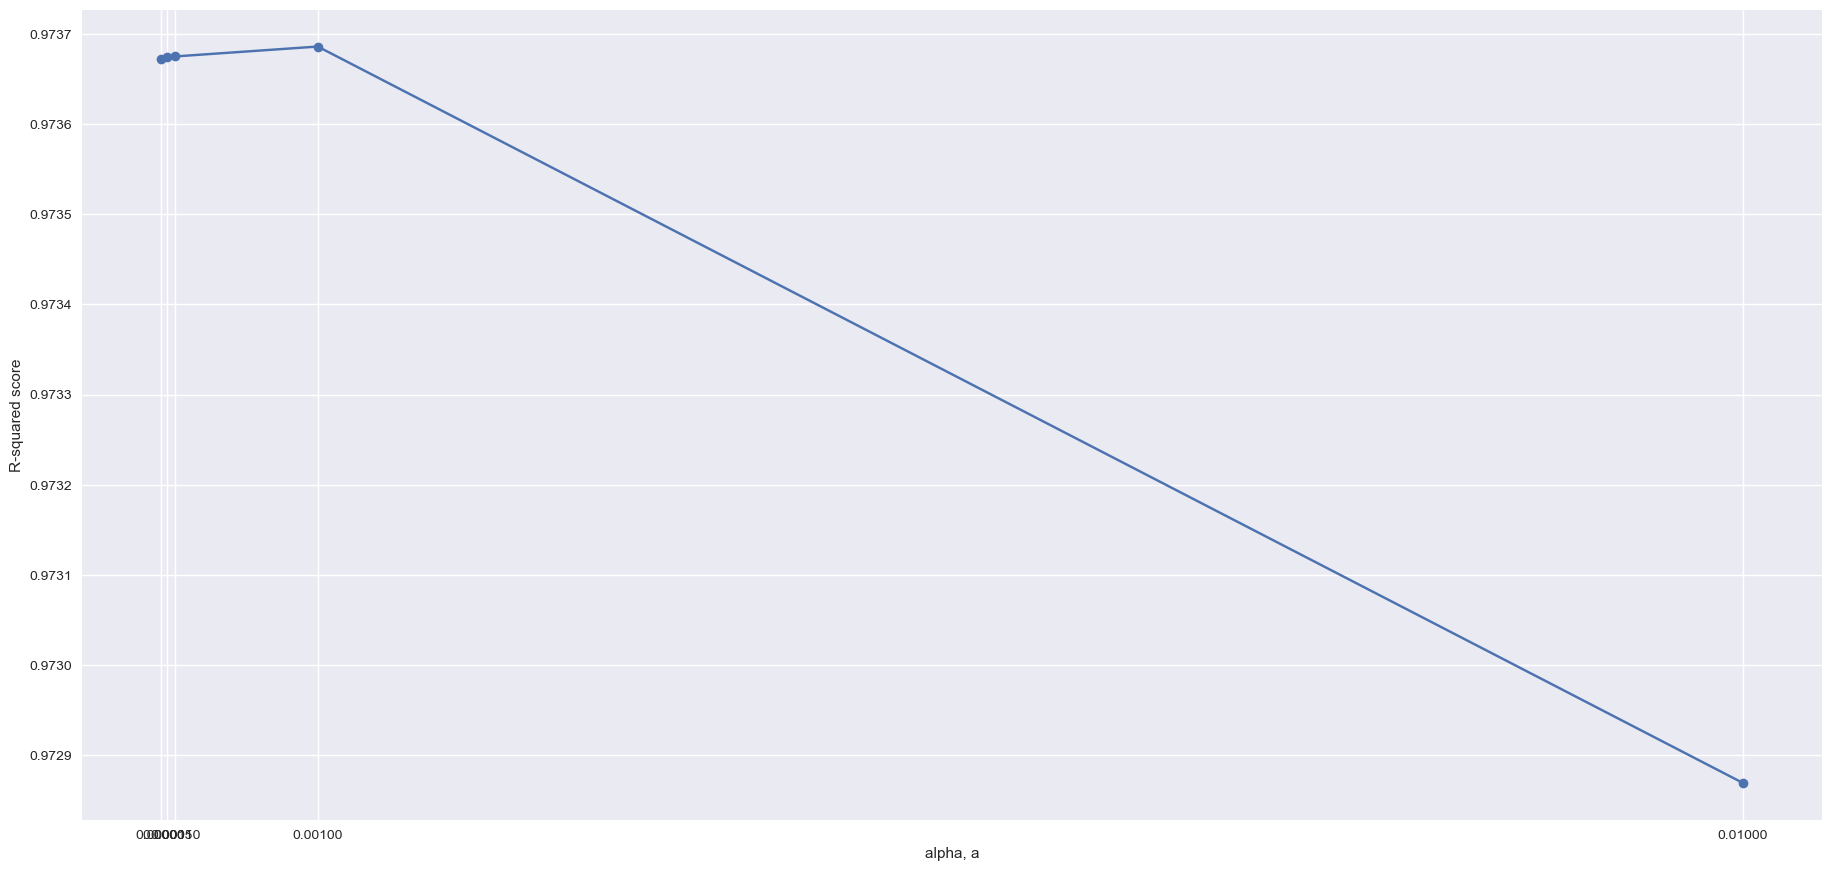

In [14]:
plt.figure(figsize=(20,10))


plt.figure(figsize=(20, 10))

alphas = [0.00001, 0.00005, 0.0001, .001, .01]
scores = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X_train_sc, y_train)  # Fit the Lasso model
    score = lasso.score(X_test_sc, y_test)  # Calculate the R-squared score
    scores.append(score)
    print("iteration {} done".format(a))

plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('R-squared score')
plt.xticks(alphas)
plt.show()

I could do a grid search but I want the highest r value which is at .001

In [15]:
#set lasso alpha
lasso = Lasso(alpha=.001)

# fit the model
best_lasso_model = lasso.fit(X_train_sc, y_train)

# predict on the data set
y_pred = best_lasso_model.predict(X_test_sc)

# calculate MSE, MAPE, R Squared
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
r_squared = r2_score(y_test, y_pred)


# print the results
print(f'The mean squared error is: {test_mse}')
print(f'The test RMSE is:{test_rmse}')
print(f'The R Squared value is: {r_squared}')


The mean squared error is: 1.1609252261565062
The test RMSE is:1.0774624012727805
The R Squared value is: 0.9736859378474845


The results against our testing data is very good. 

In [16]:
# builds an array of the coefficents
lasso_coef = best_lasso_model.coef_

# puts the coefficents in a df
df_lasso = pd.DataFrame([lasso_coef])

# merges the dfs together and prints it. this will tell us what features are being used. 
df_lasso = pd.DataFrame(lasso_coef)
names = pd.DataFrame(list(X.columns))
df_lasso  = pd.concat([names, df_lasso], axis = 1)
df_lasso .columns = ['Feature', 'lasso_coeff']
df_lasso  = df_lasso .sort_values(by='lasso_coeff', ascending = False)
df_lasso_sig = df_lasso[df_lasso['lasso_coeff']!=0]
df_lasso_sig



,Feature,lasso_coeff
17,WAB,5.982439
0,#GAMES,2.854410
4,EFG_O,1.438617
2,ADJDE,1.322411
7,TORD,0.845190
8,ORB,0.491716
19,YEAR,0.428067
18,SEED,0.322083
50,CONFERENCE_Slnd,0.189788
46,CONFERENCE_SB,0.151868


In [17]:
intercept = best_lasso_model.intercept_ # get the intercept for the model
print(intercept)

15.958836053938956


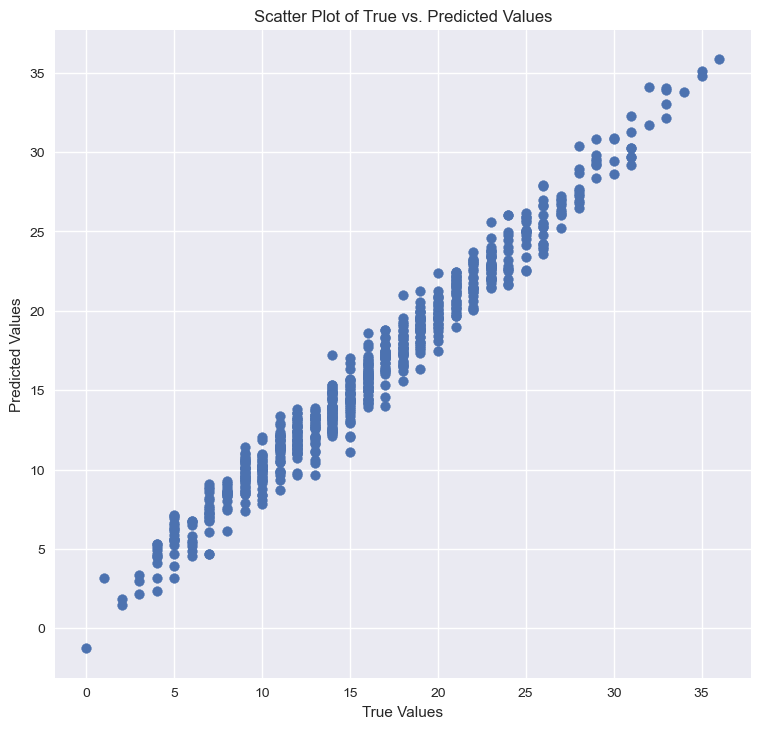

In [18]:


plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of True vs. Predicted Values")
plt.show()

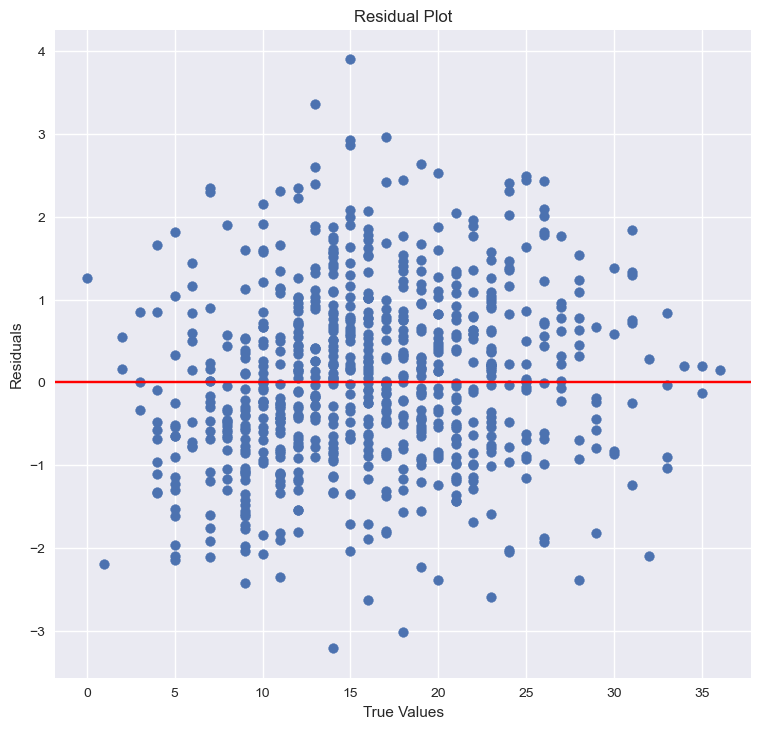

In [19]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 8))
plt.scatter(y_test, residuals)
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()


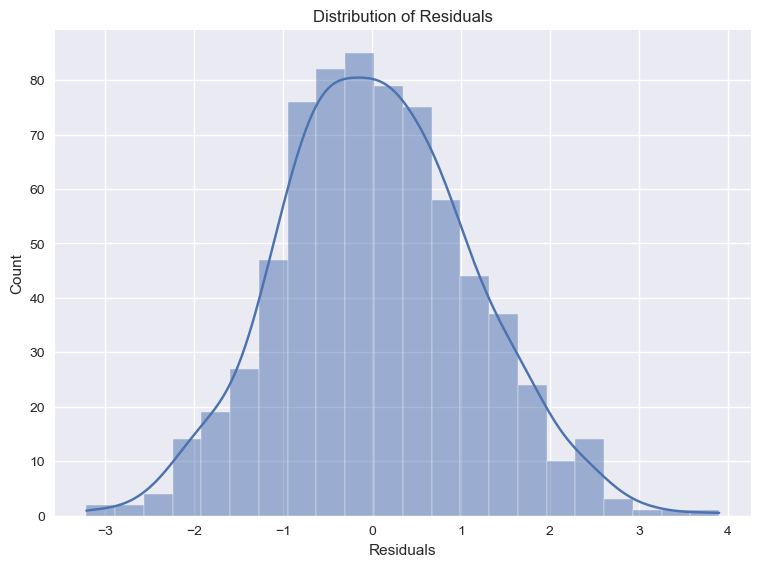

In [20]:


plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

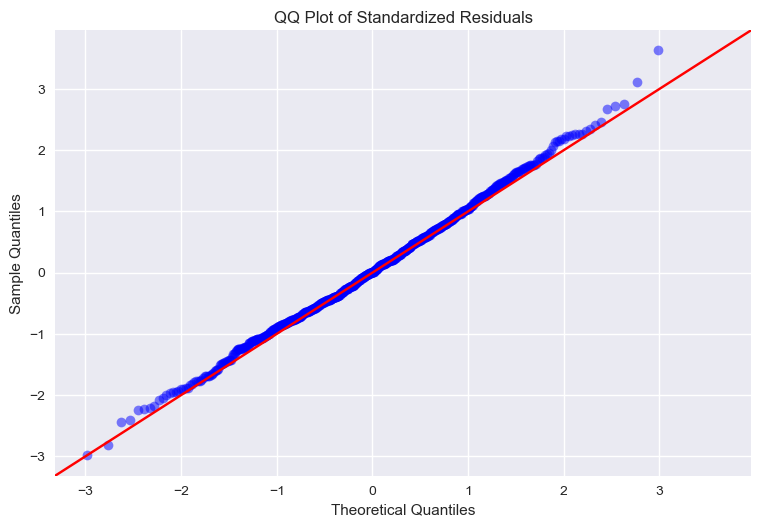

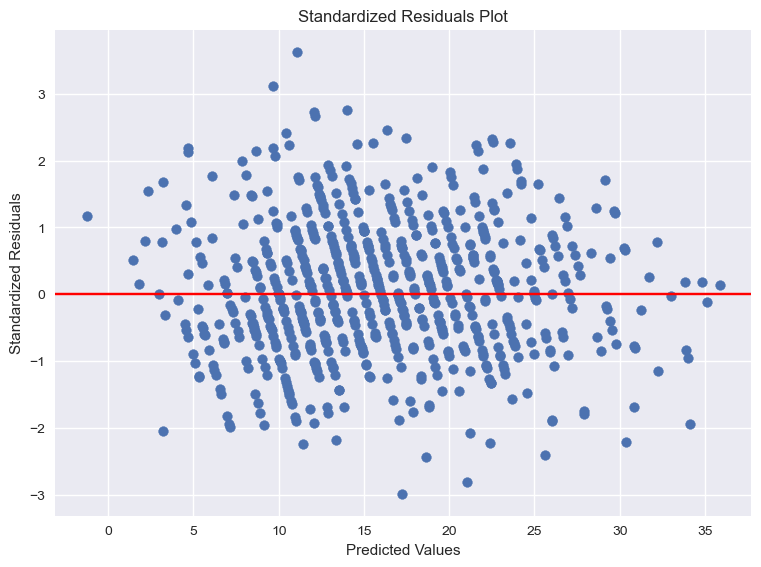

In [21]:
standardized_residuals = residuals / np.std(residuals)

# Create a QQ plot
sm.qqplot(standardized_residuals, line='45', fit=True, alpha=0.5, markerfacecolor='b')
plt.title("QQ Plot of Standardized Residuals")
plt.show()

# Standardized Residuals Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals Plot")
plt.show()

In [22]:
# prints the first five rows of how our model did vs the actual values
lasso_pred = best_lasso_model.predict(X_test_sc)


lasso_results = pd.DataFrame(y_test.reset_index())
df_lasso_pred = pd.DataFrame(lasso_pred)
lasso_results = pd.concat([lasso_results, df_lasso_pred], axis = 1)
lasso_results = lasso_results.rename(columns = {0:'lasso_pred'})
lasso_results.head()

,TEAM,#WINS,lasso_pred
0,Northern Colorado,16,17.895614
1,Presbyterian,4,4.578499
2,Colgate,23,23.363010
3,South Carolina St.,15,13.102182
4,Manhattan,15,13.969005


In [23]:
# prints the previous as well as an additional column for the residuals
lasso_results['lasso_resid'] = lasso_results['#WINS'] - lasso_results['lasso_pred']

df_results = lasso_results
df_results.head()

,TEAM,#WINS,lasso_pred,lasso_resid
0,Northern Colorado,16,17.895614,-1.895614
1,Presbyterian,4,4.578499,-0.578499
2,Colgate,23,23.363010,-0.363010
3,South Carolina St.,15,13.102182,1.897818
4,Manhattan,15,13.969005,1.030995


## Question 2: Which conference?

In [31]:
# train a simple linear regession model
conference_columns = [col for col in df_CB.columns if col.startswith('CONFERENCE')]
X = df_CB[conference_columns]
y = target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
lm_Wins = sm.OLS(y_train, X_train).fit()
print(lm_tv.summary())


                            OLS Regression Results                            
Dep. Variable:                  #WINS   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     12.28
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           2.70e-62
Time:                        18:12:21   Log-Likelihood:                -9099.6
No. Observations:                2818   AIC:                         1.827e+04
Df Residuals:                    2783   BIC:                         1.848e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.0643      0.231     

In [33]:
#make predictions on the test data
X_test = sm.add_constant(X_test)
y_pred = lm_tv.predict(X_test)

#calculate evaluation metrics for the testing data
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on Test Data: {mse}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")
print(f"R-squared (R2) on Test Data: {r2}")

Mean Squared Error (MSE) on Test Data: 38.78725987665823
Root Mean Squared Error (RMSE) on Test Data: 6.227941865227889
R-squared (R2) on Test Data: 0.12083022737025151


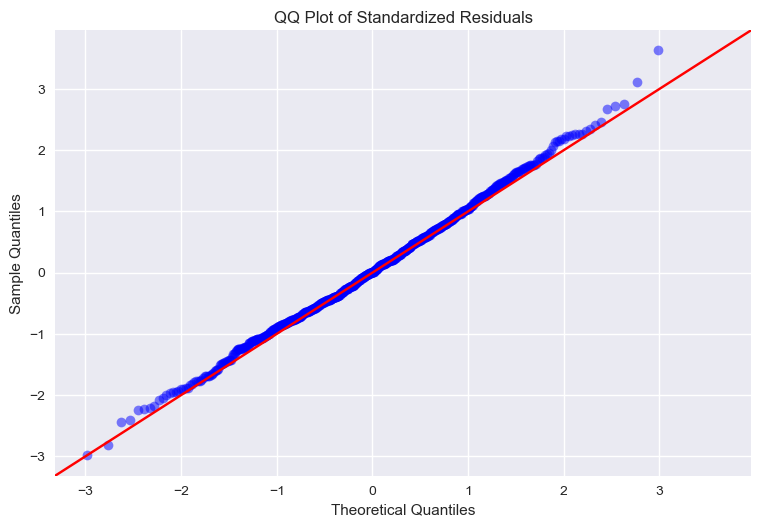

In [34]:
standardized_residuals = residuals / np.std(residuals)

# Create a QQ plot
sm.qqplot(standardized_residuals, line='45', fit=True, alpha=0.5, markerfacecolor='b')
plt.title("QQ Plot of Standardized Residuals")
plt.show()

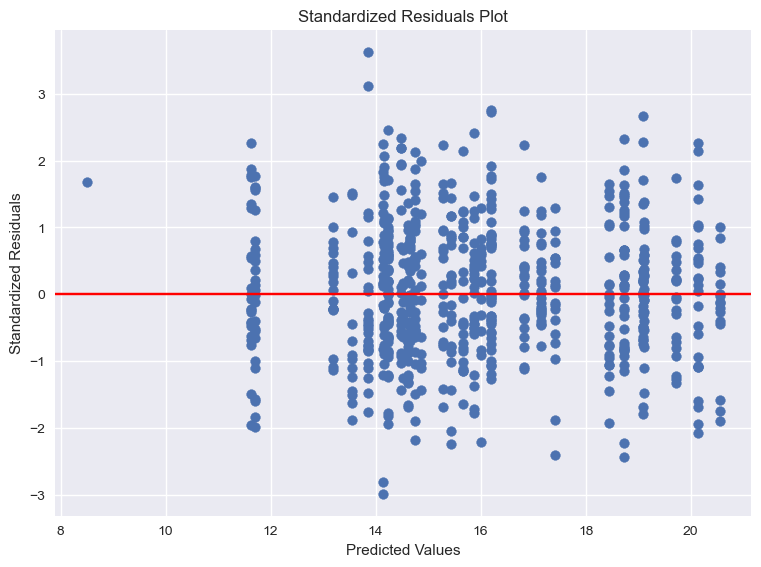

In [35]:
# plot standardized residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals Plot")
plt.show()